### Boston 주택 가격 예측 모델

### Reuters 딥러닝 모델


### CIFAR10 딥러닝 모델


- 과정 개요 Boston 주택 가격 예측 모델


- 데이터 로드 및 전처리 모델 구성 및 컴파일 모델 학습 모델 평가 및 예측 Reuters 딥러닝 모델


- 데이터 로드 및 전처리 모델 구성 및 컴파일 모델 학습 모델 평가 및 예측 CIFAR10 딥러닝 모델


- 데이터 로드 및 전처리 모델 구성 및 컴파일 모델 학습 모델 평가 및 예측 학습 목표 Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다. Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다. CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습.

## 8-2. Boston 주택 가격 예측 모델



## 데이터 로드 및 전처리

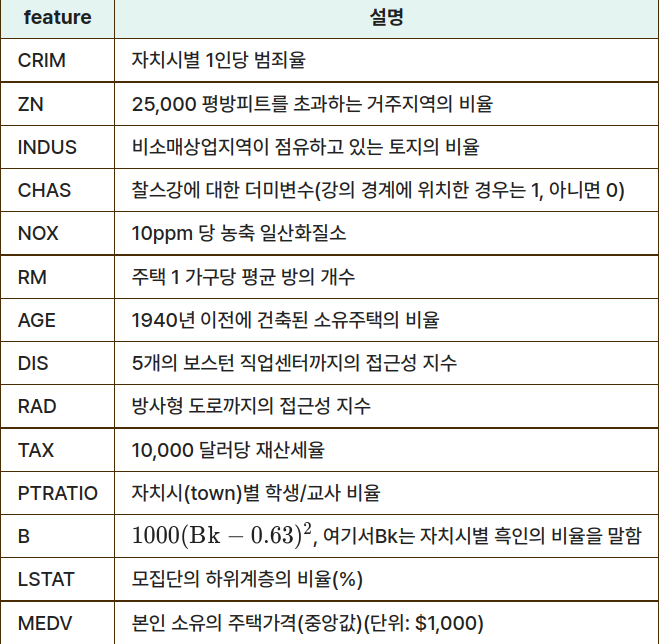

In [41]:
from tensorflow.keras import models, layers, utils # 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing
import matplotlib.pyplot as plt

In [42]:
from keras.datasets import boston_housing # keras.datasets 안에 boston_housing 데이터셋을 가져와 로드.

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data)) # 데이터셋의 크기를 확인
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업, 2분 feature 단위가 다 틀려 처리필요.

- 표준화 과정 (식) 실제값-평균/표준편차

###  문제 1-1

In [43]:
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다. Q이코드는 어딨나?
mean = train_data.mean(axis=0)  
train_data = train_data - mean # 입력 데이터의 각 특성의 평균을 뺌

std = train_data.std(axis=0) 
train_data = train_data / std # 평균을 뺀 입력 데이터에서 표준편차로 나눔.

test_data = test_data - mean
test_data = test_data / std # 강의와 동일

## 모델 구성 및 컴파일

Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

### 문제 1-2 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일

- 모델의 최적 학습을 위해 batch, 에폭 횟수를 조절하는거 중요 : 데이터 총1만개, batch size =100이면 100개 데이터를 1번 넣으면 one iteration, batch size =100 10번 돌렸으면 one 에폭. batch, 에폭 횟수를 잘 조절하는게 핵심 노하우. 

- Q layer를 몇층으로 쌓는게 유용? -> 데이터 404개면 총 3층 적절. 대량데이터는 엄청 많은 layer층. 총 4개층 layers 100, 64, 32, 10으로.  

- batch량 결정은 자기 컴퓨터 GPU 성능과도 관계있음. 64했는데 커널이 끊기면 32로 16, 8로 줄여 내모델과 컴 GPU에 적절한거 찾아라,  확인하는법 : 동영상+ 소리 119일 총 1:29 : 우상단 nvidia-smi

In [44]:
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용합니다. # 케창집 172p

#model.compile(loss='categorical_crossentropy', # compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정.
              #optimizer='sgd',
              #metrics=['accuracy'])


#model = models.Sequential() # 딥러닝 모델 구성을 위해서 Sequential() 함수를 이용해 순차적으로 레이어를 구성
#model.add(keras.Input(train_data.shape[1], name='input'))# Q name='input'은 왜?-> 아래코드상 층덩어리시작 알림, 층 구분용 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정

#model.add(layers.Flatten(input_shape=[28, 28], name='flatten')) # Q 아래 첫줄 파라미터가 왜 0?-> 준표님왈 그냥 설정.  1차원으로 쭉 펼쳐주는 layers, 아래보면 크기shape 784
#model.add(layers.Dense(100, activation='relu', name='dense1')) # 이후 4줄, layers.Dense를 여러겹 사용하여 유닛수를 100, 64, 32, 10으로 4겹 쌓아주고, 활성화 함수로 relu를 사용.
#model.add(layers.Dense(64, activation='relu', name='dense2'))
#model.add(layers.Dense(32, activation='relu', name='dense3'))
#model.add(layers.Dense(10, activation='softmax', name='output'))# 여긴 왜? name='output'- 층덩어리 마지막, 전체 카테고리의 수인 10을 유닛수로 지정하고, 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구함.
#model.summary()

#model = models.Sequential() 
#def build_model():
    #model = keras.Sequential()
    #layers.Dense(64, activation="relu")
    #layers.Dense(64, activation="relu")
    #layers.Dense(1)

    #model.compile(optimizer="adam", loss='mse', metrics=['mse'])
    #return model
  

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

- epochs와 batch size는 자유롭게 설정. 모델 학습 후에는 모델 학습 결과를 시각화

### 문제 1-3

  - 예측을 위한 딥러닝 모델을 학습.

In [45]:
model.compile(optimizer='adam',
              loss='mse', # compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정.
              metrics=['mae'])  # Q  loss, metrics를 각각 mse, mae 줘야 하는지 모르겠는데 번갈아 넣어보고 loss나 accuracy 잘 나오는게 뭔지 파악. .

In [46]:
#(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()

#x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 # test_size=0.3, # 학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로
                                                  #random_state=123) # 고정해놓으면 계속 일정하게 섞인다는

#print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
#print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
#print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
#print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))
# [[YOUR CODE]]

#from sklearn.model_selection import train_test_split

#(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()

#history = model.fit(x_train, y_train,
                    #epochs=10,
                   # batch_size=50,
                    #validation_data=(x_val, y_val))


history = model.fit(train_data, train_labels,
                    batch_size=50,
                    epochs=50,
                    validation_split=0.2)# test data말고 validation  data를 20%만 할애. train, validation(train을 쪼갠) , test 3가지.

Epoch 1/50
7/7 [==============================] - 0s 18ms/step - loss: 556.5173 - mae: 21.7030 - val_loss: 610.7518 - val_mae: 22.9206
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 526.8375 - mae: 21.0109 - val_loss: 579.9191 - val_mae: 22.2426
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 496.8867 - mae: 20.2619 - val_loss: 545.8976 - val_mae: 21.4571
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 461.9817 - mae: 19.3635 - val_loss: 506.7943 - val_mae: 20.5178
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 421.1294 - mae: 18.2882 - val_loss: 460.4720 - val_mae: 19.3853
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 374.3195 - mae: 17.0162 - val_loss: 406.6892 - val_mae: 17.9733
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 321.0993 - mae: 15.5647 - val_loss: 346.2981 - val_mae: 16.3289
Epoch 8/50
7/7 [==============================] - 0s 4ms/step

- 손실함수 : 모델의 성능을 끌어올리기위해 참조하는 값  

- metrics척도 : 모델을 평가하기위해 사용하는값. 손실함수와 헷갈릴수도.


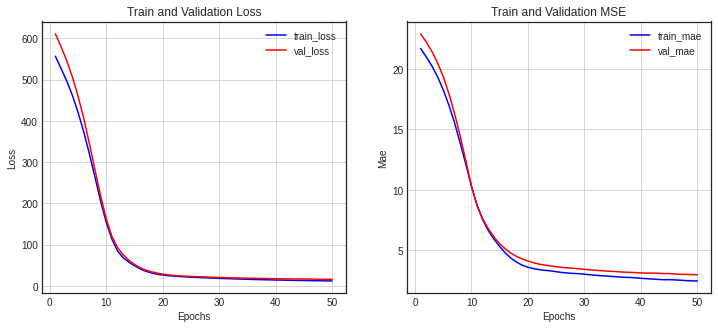

In [47]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mae')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

- 테스트 데이터를 가져와 모델 성능을 평가

### 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

In [48]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 24.3706 - mae: 3.6183


[24.37061309814453, 3.6182734966278076]

## 8-3. Reuters 딥러닝 모델

- 다중분류 문제


- 다양한 성능 향상 방법을 사용하여 성능을 더 높일 수 있습니다. 사용했던 ReLU와는 다른 활성화함수를 사용, Batch Normalization과 Dropout을 적용해 봄. Model  Checkpoint와 Early Stopping 콜백 함수도 적용.


### 데이터 로드 및 전처리

- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 파라메터 조정을 통해 단어의 개수는 10000개로 제한.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks # callbacks, utils 도 import ?  
from tensorflow.keras import utils
from keras.datasets import reuters

### 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리.

In [59]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력.
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력.
print("전체 학습 데이터: {}  레이블: {}".format(train_data.shape, train_labels.shape))
print("학습용 데이터: {}  레이블: {}".format(x_train.shape, y_train.shape))
print("검증용 데이터: {}  레이블: {}".format(x_val.shape, y_val.shape))
print("테스트용 데이터: {}  레이블: {}".format(test_data.shape, test_labels.shape))

전체 학습 데이터: (8982,)  레이블: (8982,)
학습용 데이터: (6736,)  레이블: (6736,)
검증용 데이터: (2246,)  레이블: (2246,)
테스트용 데이터: (2246,)  레이블: (2246,)


In [60]:
train_labels[10] # 케창딥 161p. 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수.

3



### 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

In [61]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [62]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

from tensorflow.keras import utils

y_train = utils.to_categorical(y_train) # 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성 및 컴파일

- Batch Normalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성.


### 문제 2-3

In [63]:
model = models.Sequential()
model.add(layers.Input(shape=(10000, )))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46))
model.add(layers.Activation('softmax'))

In [64]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
activation_10 (Activation)   (None, 128)              

## 모델 학습


### 문제 2-4 Mode lCheckpoint와 Early Stopping 콜백 함수를 적용하여 모델 학습을 진행.

In [65]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

### 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화

In [66]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
14/14 [==============================] - 1s 39ms/step - loss: 3.0161 - accuracy: 0.3226 - val_loss: 3.4198 - val_accuracy: 0.5779
Epoch 2/1000
14/14 [==============================] - 0s 14ms/step - loss: 1.8160 - accuracy: 0.5928 - val_loss: 2.9660 - val_accuracy: 0.6585
Epoch 3/1000
14/14 [==============================] - 0s 13ms/step - loss: 1.4402 - accuracy: 0.6695 - val_loss: 2.6647 - val_accuracy: 0.6941
Epoch 4/1000
14/14 [==============================] - 0s 15ms/step - loss: 1.2288 - accuracy: 0.7151 - val_loss: 2.4395 - val_accuracy: 0.7057
Epoch 5/1000
14/14 [==============================] - 0s 14ms/step - loss: 1.0891 - accuracy: 0.7432 - val_loss: 2.2652 - val_accuracy: 0.7177
Epoch 6/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.9694 - accuracy: 0.7717 - val_loss: 2.0581 - val_accuracy: 0.7208
Epoch 7/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.8948 - accuracy: 0.7813 - val_loss: 1.8970 - val_accuracy: 0.7222

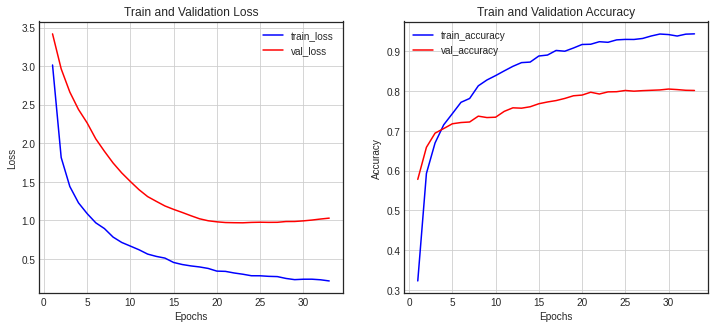

In [67]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 테스트 데이터셋을 이용해 모델을 평가

In [68]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9651 - accuracy: 0.7934


[0.9651318192481995, 0.7934104800224304]

### epoch을 1000에서 500으로 줄이니 챠트는 메끄러워 졌으나 챠트가 매끈한게 결과가 좋은게 아니였음.

- loss는 더 커지고 accuracy 더 줄어듬. (각각 0.95 ->3.8, 0.79-> 0.019로)  


- loss가 줄어드는 방향으로 accuracy는 점점 커지는 방향의 챠트로 진폭이 큰게 모델을 잘 돌린 것인듯. 

### 8-4. CIFAR10 딥러닝 모델


-  32x32 픽셀의 6,000개 컬러 이미지. 데이터셋의 각 이미지는 10개의 클래스로 라벨링



### 데이터 로드 및 전처리
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

### 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리



In [24]:
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력.

170508288/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (35000, 32, 32, 3) 레이블: (35000, 1)
검증 데이터: (15000, 32, 32, 3) 레이블: (15000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


### 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # cifar10의 분류에 해당하는 feature들 정의

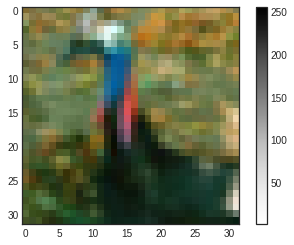

In [26]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show() # 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화.

In [27]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 32, 32, 3)


In [28]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3) # Q. -1은 뭐?

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(35000, 3072)
(15000, 3072)
(10000, 3072)


In [30]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일


BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성


###  문제 3-3

In [32]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_7 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_8 (Activation)    (None, 1024)             

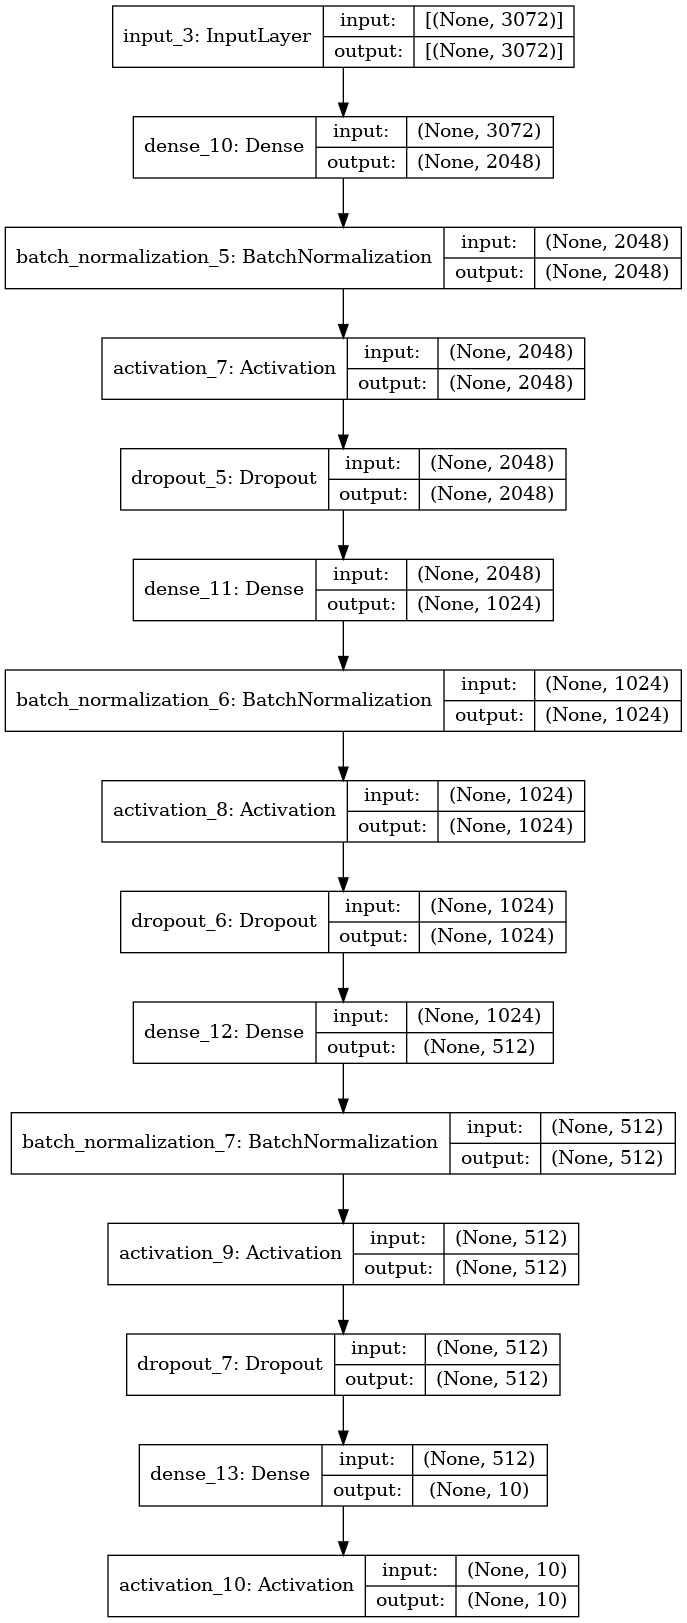

In [34]:
utils.plot_model(model, show_shapes=True)

### 모델 학습


- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

### 문제 3-4

In [37]:
check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

In [38]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/50
69/69 [==============================] - 2s 22ms/step - loss: 2.6467 - accuracy: 0.1584 - val_loss: 2.3151 - val_accuracy: 0.0993
Epoch 2/50
69/69 [==============================] - 1s 11ms/step - loss: 2.3751 - accuracy: 0.2156 - val_loss: 2.3611 - val_accuracy: 0.0993
Epoch 3/50
69/69 [==============================] - 1s 12ms/step - loss: 2.2752 - accuracy: 0.2413 - val_loss: 2.4264 - val_accuracy: 0.0993
Epoch 4/50
69/69 [==============================] - 1s 11ms/step - loss: 2.1888 - accuracy: 0.2573 - val_loss: 2.4899 - val_accuracy: 0.1009
Epoch 5/50
69/69 [==============================] - 1s 11ms/step - loss: 2.1180 - accuracy: 0.2745 - val_loss: 2.5325 - val_accuracy: 0.1010
Epoch 6/50
69/69 [==============================] - 1s 12ms/step - loss: 2.0716 - accuracy: 0.2861 - val_loss: 2.5373 - val_accuracy: 0.1057
Epoch 7/50
69/69 [==============================] - 1s 12ms/step - loss: 2.0214 - accuracy: 0.3010 - val_loss: 2.4937 - val_accuracy: 0.1089
Epoch 8/50
69

### 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화

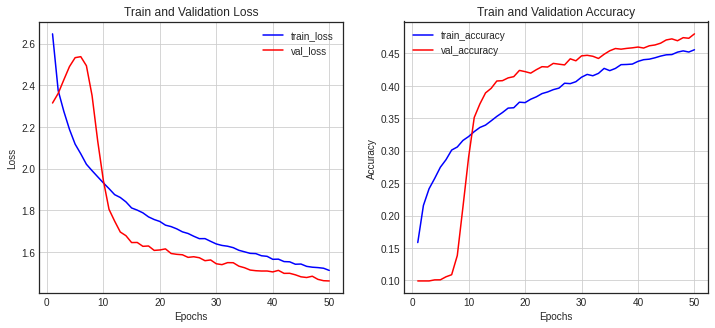

In [42]:

def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()
    
show_history(history)

- 하단 validation loss와 validation accuracy 관련 URL상 : Validation이 심하게 진폭이 크면 Validation data 만들때 특정 label들에 대해서 labeling을 잘못 한것일수도. 클래스가 100개 인데 validation이 200장이라면 잘못되면 metric/loss가 널뛰기를 할 수 있다. 1. Validation 데이터가 제대로 나뉘어 졌는지, Labelling을 제대로 작업 되었는지 확인-> 결국 epoch를 조절해서 해결. 


### 모델 평가 및 예측


테스트 데이터셋을 이용해 모델을 평가

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4502 - accuracy: 0.4831


[1.4502161741256714, 0.4830999970436096]

## Refference 

- https://needjarvis.tistory.com/568  metrics척도 와 손실함수의 개념 비교

- https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn train, validation, test 분할 코드


- https://www.inflearn.com/questions/214098/%ED%95%99%EC%8A%B5-%EC%A4%91-validation-loss%EC%99%80-validation-accuracy%EA%B0%80-%EA%B8%89%EA%B2%A9%ED%95%98%EA%B2%8C-%EB%B3%80%ED%95%98%EB%8A%94-%ED%98%84%EC%83%81%EC%9D%98-%EC%9B%90%EC%9D%B8%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C%EC%9A%94
  validation loss와 validation accuracy 
  
- https://needjarvis.tistory.com/568  metrics척도 

- https://durian9s-coding-tree.tistory.com/4 callback

## 회고 

- loss, metrics를 각각 왜 mse, mae 줘야 하는지 모름. 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용. 노드상에도 일반적으로 mae나 accuracy를 사용한다고 하는데 서로 mse, mae를 각각 줘도 돌아가는지 ?

- train, validation, test 3가지를 잘 코드 짜야할할듯. X-val등 validation 오류가 많아 머리 아플지경이었음. 검색으로 잘안나옴. 아직 충분히 숙달안됨. 

- '보스톤 주택모델'에서 에폭을 50번 학습시킬때가 에폭 150번 할때보다 정확도가 더 좋아지는걸 확인해보았음.

- CIFAR도 여러번 에폭과 batch, 손실함수, Optimizer등을 바꿔가며 하려니 시간이 만만치 않았음. 팀원들과 코드 한덩이라도 다듬는걸 해볼수있어서 좋았음. 저번 E-7보다 뭔가 남는게 있어서 다행임. 